In [3]:
import pandas as pd
import numpy as np

# Parameters
np.random.seed(42)

# Generate timestamps spanning 2020-2024
samples_per_month = 25  # Samples from each month
years = range(2020, 2025)
months = range(1, 13)
timestamps = []

for year in years:
    for month in months:
        # Get number of days in this month
        if month == 2:
            days_in_month = 29 if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0) else 28
        elif month in [4, 6, 9, 11]:
            days_in_month = 30
        else:
            days_in_month = 31

        # Random days and hours for this month
        days = np.random.choice(range(1, days_in_month+1), size=samples_per_month)
        hours = np.random.choice(range(24), size=samples_per_month)

        for day, hour in zip(days, hours):
            timestamps.append(pd.Timestamp(year=year, month=month, day=int(day), hour=int(hour)))

timestamps.sort()  # Sort chronologically
data = pd.DataFrame(timestamps, columns=['Timestamp'])

# Machine Hours (0-24 hours with realistic distribution)
prob_dist = [0.1] + [0.0375]*24  # Higher probability of 0 hours (idle time)
prob_dist = np.array(prob_dist)/sum(prob_dist)  # Normalize
data['Machine_Hours'] = np.random.choice(range(25), size=len(data), p=prob_dist)

# Material Processed (tons) - correlated with machine hours
data['Material_Processed_tons'] = (data['Machine_Hours'] * 4.2  # 4.2 tons/hour
                                  + np.random.normal(0, 10, len(data))
                                 ).clip(lower=0).round(1)

# Environmental Factors - with seasonal patterns
hours = data['Timestamp'].dt.hour
months = data['Timestamp'].dt.month
data['Temperature_C'] = (25 + 10*np.sin(2*np.pi*(months-1)/12)  # Seasonal component
                       + 5*np.sin(2*np.pi*hours/24)  # Daily component
                       + np.random.normal(0, 3, len(data))).round(1)
data['Humidity_%'] = (60 - 10*np.sin(2*np.pi*(months-1)/12)  # Seasonal component
                    - 10*np.sin(2*np.pi*hours/24)  # Daily component
                    + np.random.normal(0, 10, len(data))).clip(0,100).round(1)

# Time of Day (Shifts)
data['Shift'] = pd.cut(hours, bins=[-1,7,15,23], labels=['Night','Morning','Evening'])

# Machine Type Distribution
machine_types = ['Excavator', 'Hauler', 'Crusher']
data['Machine_Type'] = np.random.choice(machine_types, size=len(data), p=[0.5,0.3,0.2])

# Energy Consumption Calculation
energy_base = (data['Machine_Hours'] * 150  # 150 kWh/hour base consumption
             + data['Material_Processed_tons'] * 2.5  # 2.5 kWh/ton
             - data['Temperature_C'] * 0.8  # Cooling effect
             + np.random.normal(0, 50, len(data))
             ).clip(lower=0)

# Machine type multipliers
type_factors = {'Excavator':1.1, 'Hauler':1.3, 'Crusher':1.8}
data['Energy_Consumption_kWh'] = energy_base * data['Machine_Type'].map(type_factors)

# Save to CSV
data[['Timestamp', 'Machine_Hours', 'Material_Processed_tons',
     'Temperature_C', 'Humidity_%', 'Shift', 'Machine_Type',
     'Energy_Consumption_kWh']].to_csv('mining_energy_dataset_multi_year.csv', index=False)


In [35]:
from google.colab import files
files.download('mining_energy_dataset_multi_year.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("mining_energy_dataset_multi_year.csv")

In [5]:
df.head(50)

,Timestamp,Machine_Hours,Material_Processed_tons,Temperature_C,Humidity_%,Shift,Machine_Type,Energy_Consumption_kWh
0,2020-01-02 06:00:00,23,103.6,28.8,47.0,Night,Excavator,4060.051592
1,2020-01-03 06:00:00,19,94.7,31.4,65.9,Night,Hauler,4012.519376
2,2020-01-04 02:00:00,7,20.5,27.1,54.2,Night,Hauler,1431.597987
3,2020-01-07 05:00:00,9,52.4,31.0,48.5,Night,Hauler,1920.716374
4,2020-01-07 09:00:00,12,45.9,26.8,62.0,Morning,Crusher,3307.871266
5,2020-01-08 04:00:00,20,82.7,32.3,46.5,Night,Excavator,3434.569375
6,2020-01-08 21:00:00,0,5.8,13.8,54.2,Evening,Excavator,68.166711
7,2020-01-11 11:00:00,9,35.8,26.7,66.2,Morning,Excavator,1642.950386
8,2020-01-11 11:00:00,0,11.1,30.3,51.5,Morning,Excavator,0.000000
9,2020-01-11 18:00:00,12,46.4,24.5,60.2,Evening,Hauler,2463.515591


In [6]:
print("SUMMARY STATISTICS")
df.describe()

SUMMARY STATISTICS


,Machine_Hours,Material_Processed_tons,Temperature_C,Humidity_%,Energy_Consumption_kWh
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,11.419333,48.490133,25.101867,59.879067,2361.143488
std,7.570053,32.439879,8.593441,14.573694,1661.999145
min,0.000000,0.000000,0.900000,11.400000,0.000000
25%,5.000000,19.475000,18.175000,49.900000,894.527097
50%,12.000000,48.000000,25.100000,59.800000,2295.597123
75%,18.000000,76.725000,31.700000,69.700000,3601.299071
max,24.000000,126.100000,46.200000,100.000000,6975.714830


In [7]:
df.columns

Index(['Timestamp', 'Machine_Hours', 'Material_Processed_tons',
       'Temperature_C', 'Humidity_%', 'Shift', 'Machine_Type',
       'Energy_Consumption_kWh'],
      dtype='object')

In [8]:
print("DATASET INFO :")
df.info()

DATASET INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1500 non-null   object 
 1   Machine_Hours            1500 non-null   int64  
 2   Material_Processed_tons  1500 non-null   float64
 3   Temperature_C            1500 non-null   float64
 4   Humidity_%               1500 non-null   float64
 5   Shift                    1500 non-null   object 
 6   Machine_Type             1500 non-null   object 
 7   Energy_Consumption_kWh   1500 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 93.9+ KB


In [9]:
df.columns

Index(['Timestamp', 'Machine_Hours', 'Material_Processed_tons',
       'Temperature_C', 'Humidity_%', 'Shift', 'Machine_Type',
       'Energy_Consumption_kWh'],
      dtype='object')

**EDA (EXPLORATORY DATA ANALYSIS)**



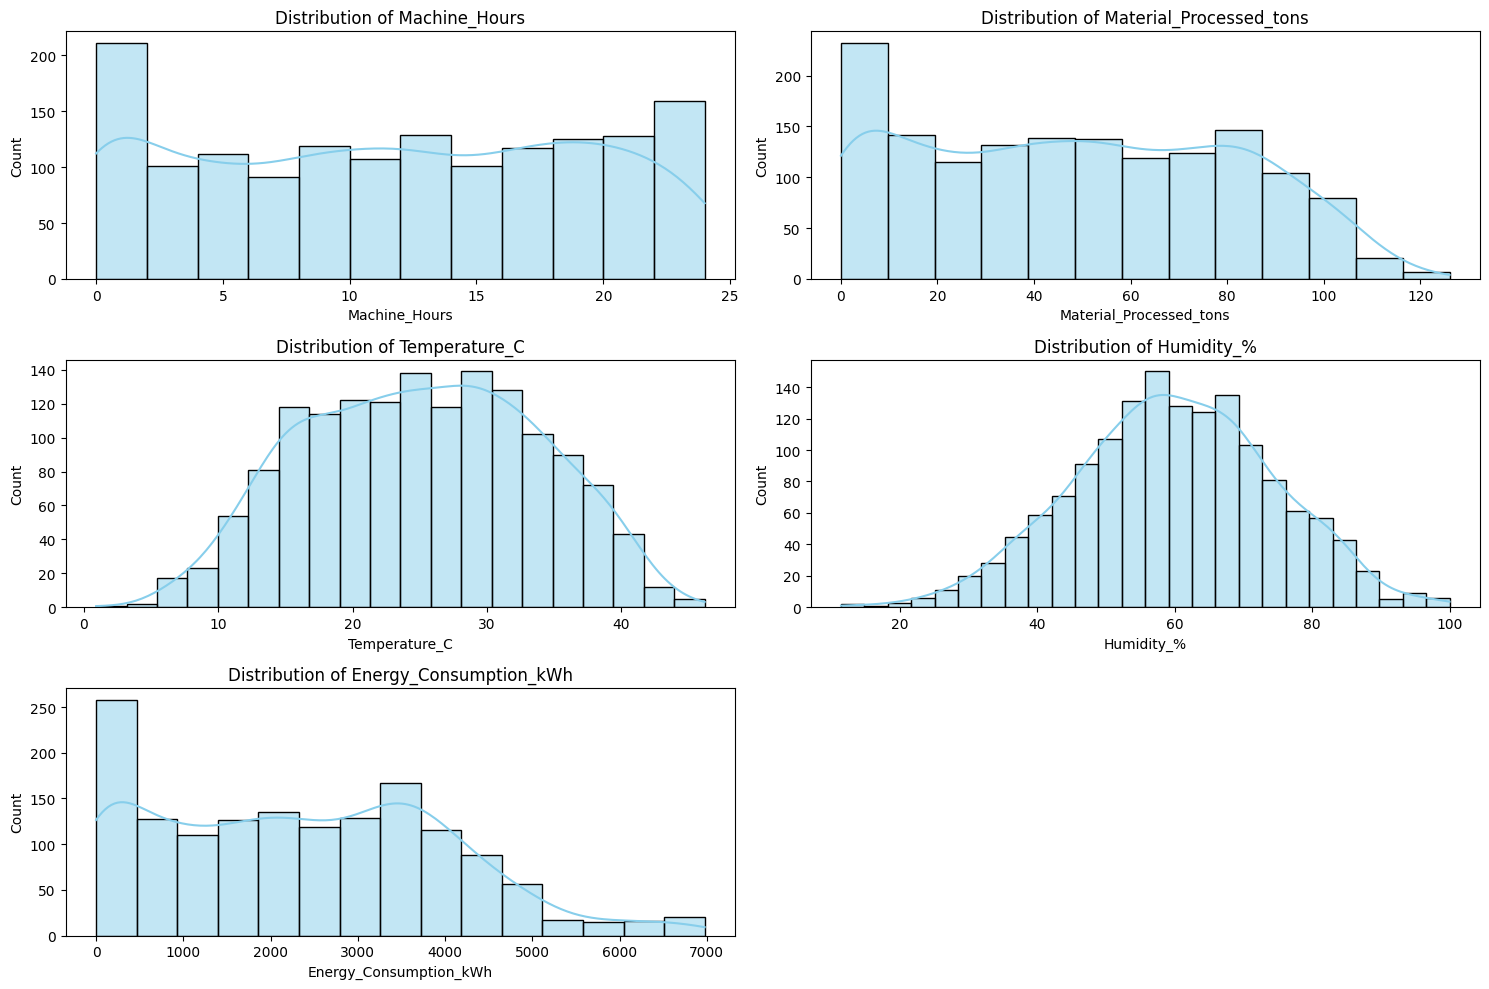

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['Machine_Hours', 'Material_Processed_tons', 'Temperature_C', 'Humidity_%', 'Energy_Consumption_kWh']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

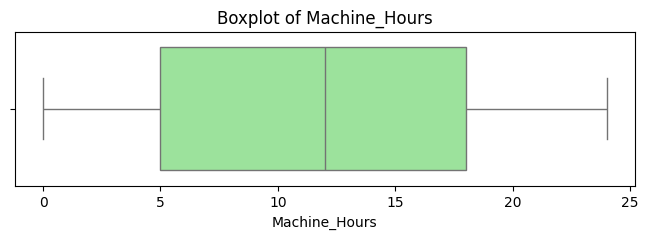

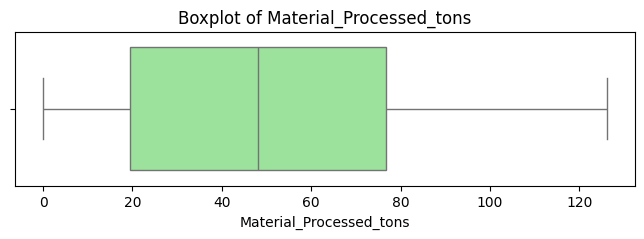

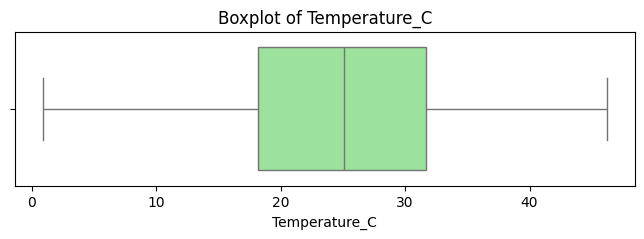

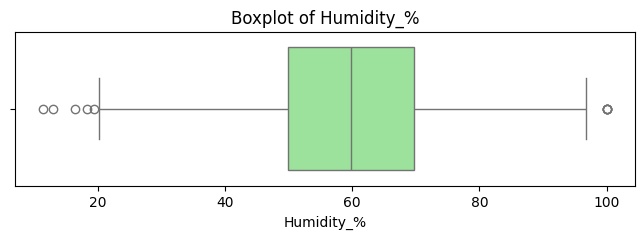

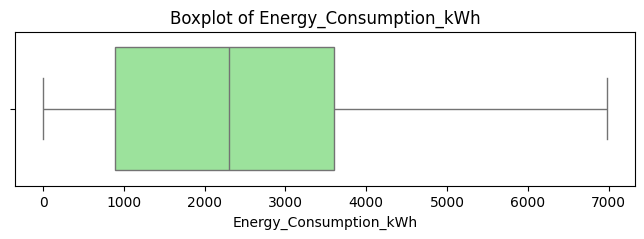

In [11]:
# 5. Boxplots for Numerical Features
for col in num_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f'Boxplot of {col}')
    plt.show()




Value counts for Shift:
Shift
Night      543
Morning    479
Evening    478
Name: count, dtype: int64


<ipython-input-12-418a757b71a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


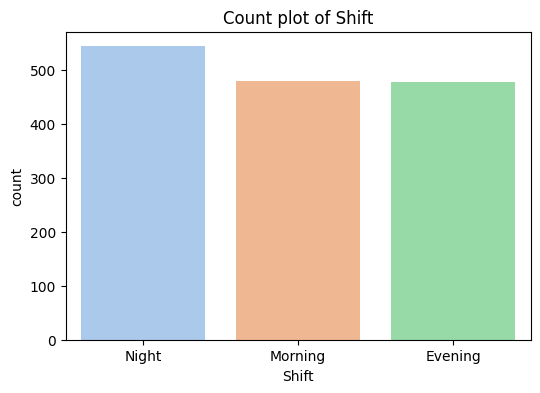


Value counts for Machine_Type:
Machine_Type
Excavator    742
Hauler       463
Crusher      295
Name: count, dtype: int64


<ipython-input-12-418a757b71a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


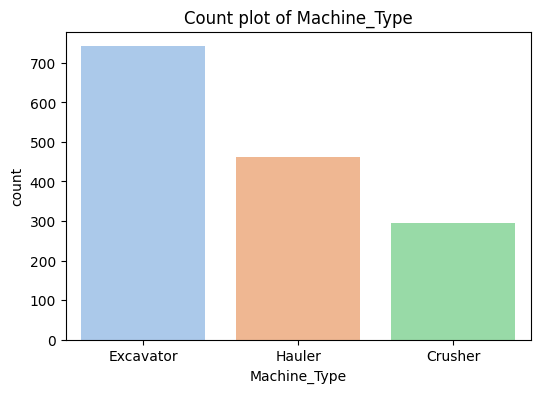

In [12]:
# 6. Value Counts and Count Plots for Categorical Features
cat_cols = ['Shift', 'Machine_Type']
for col in cat_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f'Count plot of {col}')
    plt.show()



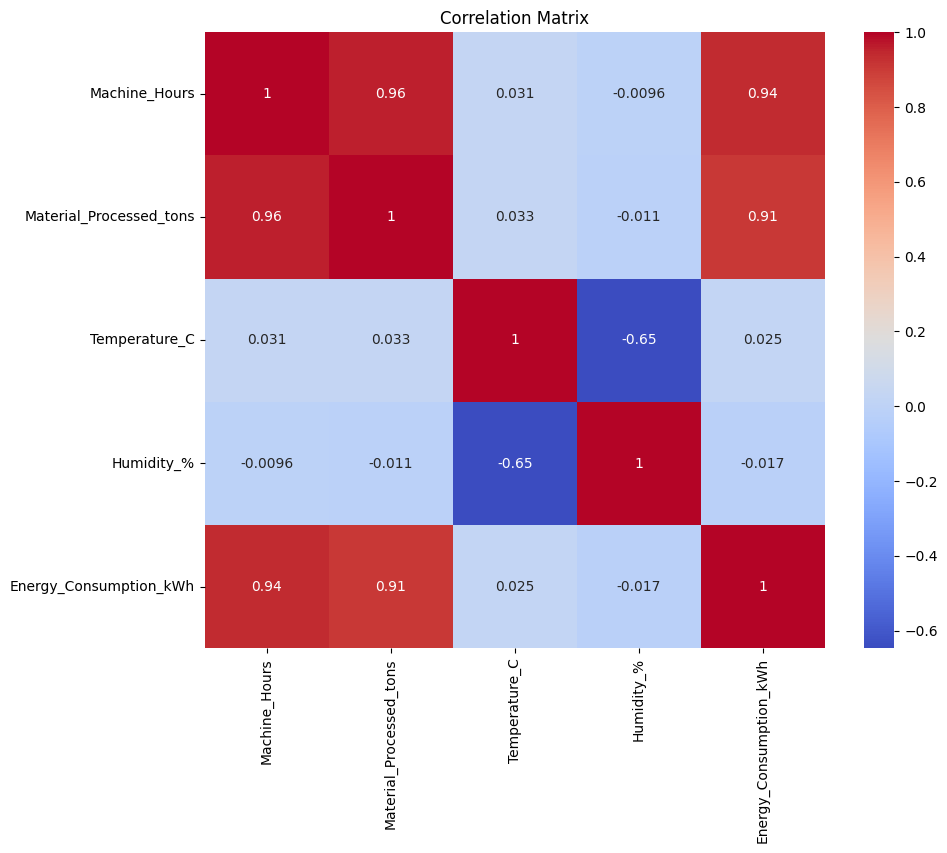

In [13]:


# 7. Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



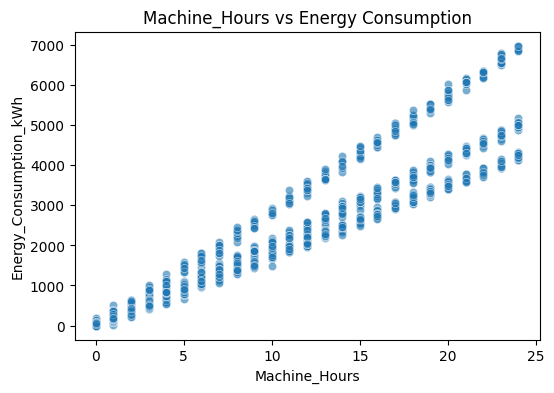

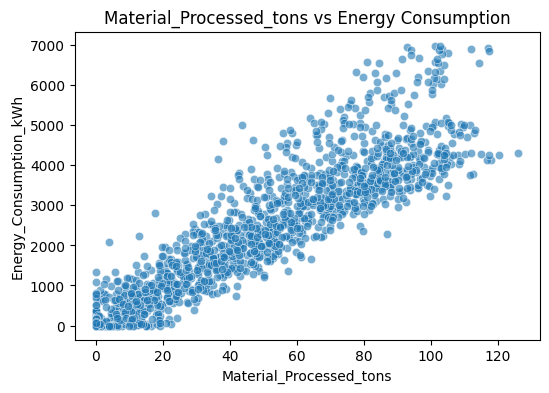

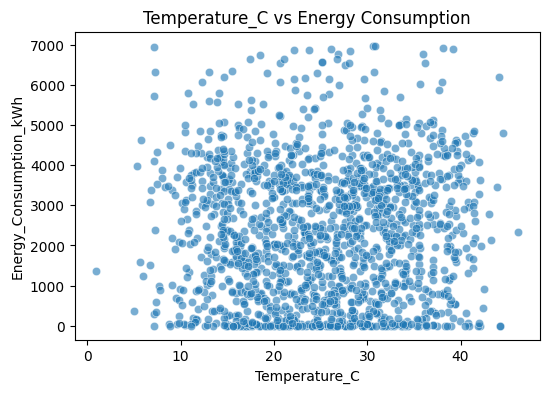

In [14]:


# 8. Scatter Plots of Key Features vs Target
for col in ['Machine_Hours', 'Material_Processed_tons', 'Temperature_C']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Energy_Consumption_kWh'], alpha=0.6)
    plt.title(f'{col} vs Energy Consumption')
    plt.show()



<ipython-input-15-d413f54821af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Energy_Consumption_kWh'], palette="Set2")


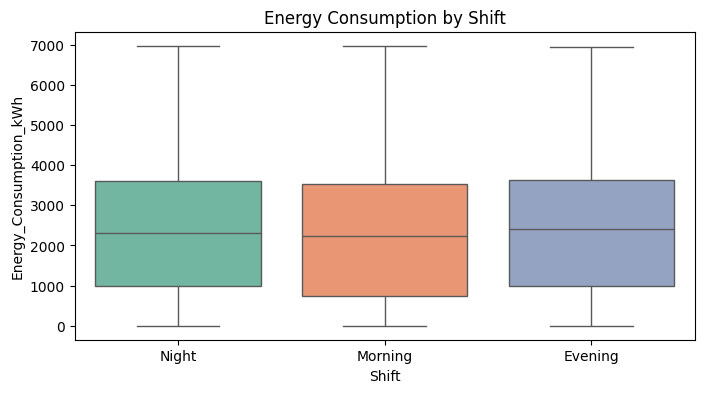

<ipython-input-15-d413f54821af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Energy_Consumption_kWh'], palette="Set2")


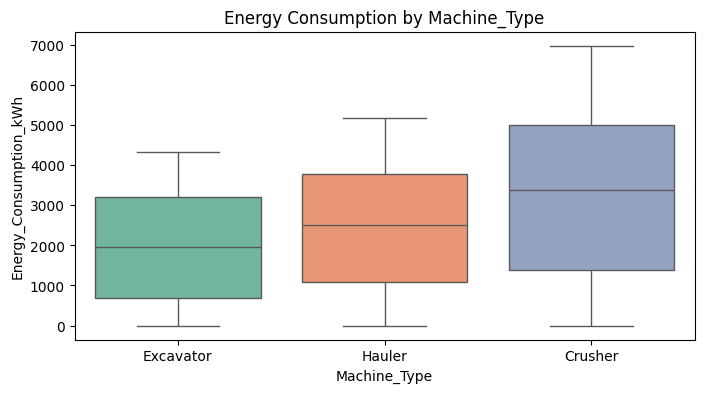

In [15]:

# 9. Boxplots of Energy Consumption by Categorical Features
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['Energy_Consumption_kWh'], palette="Set2")
    plt.title(f'Energy Consumption by {col}')
    plt.show()



In [16]:
# # 10. Time Series Plot of Energy Consumption
# if 'Timestamp' in df.columns:
#     plt.figure(figsize=(15,5))
#     plt.plot(df['Timestamp'], df['Energy_Consumption_kWh'], color="purple")
#     plt.title('Energy Consumption Over Time')
#     plt.xlabel('Timestamp')
#     plt.ylabel('Energy Consumption (kWh)')
#     plt.xticks(rotation=45)
#     plt.show()

Encoding and feature scaling

In [17]:

from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df, columns=['Machine_Type', 'Shift'], drop_first=True)

# 2. Feature scaling (optional for tree models)
num_cols = ['Machine_Hours', 'Material_Processed_tons', 'Temperature_C', 'Humidity_%']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(['Energy_Consumption_kWh', 'Timestamp'], axis=1)
y = df_encoded['Energy_Consumption_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Results:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.3f}")

Random Forest Results:
MAE: 53.58
RMSE: 68.85
R²: 0.998


In [22]:
importances = model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:\n", feat_imp)



Feature Importances:
 Machine_Hours              0.887492
Machine_Type_Excavator     0.063135
Machine_Type_Hauler        0.046753
Material_Processed_tons    0.001682
Temperature_C              0.000432
Humidity_%                 0.000374
Shift_Morning              0.000069
Shift_Night                0.000063
dtype: float64


In [34]:
import joblib
joblib.dump(model, 'energy_forecast_model.pkl')


['energy_forecast_model.pkl']